<a href="https://colab.research.google.com/github/RiyaBhurse/DecissionTree/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you are having a complex dataset you will have to draw lines like this you cannot go with a straight line using Linear regression / Logistic regression. In such case we will go with **decission tree algorithm**

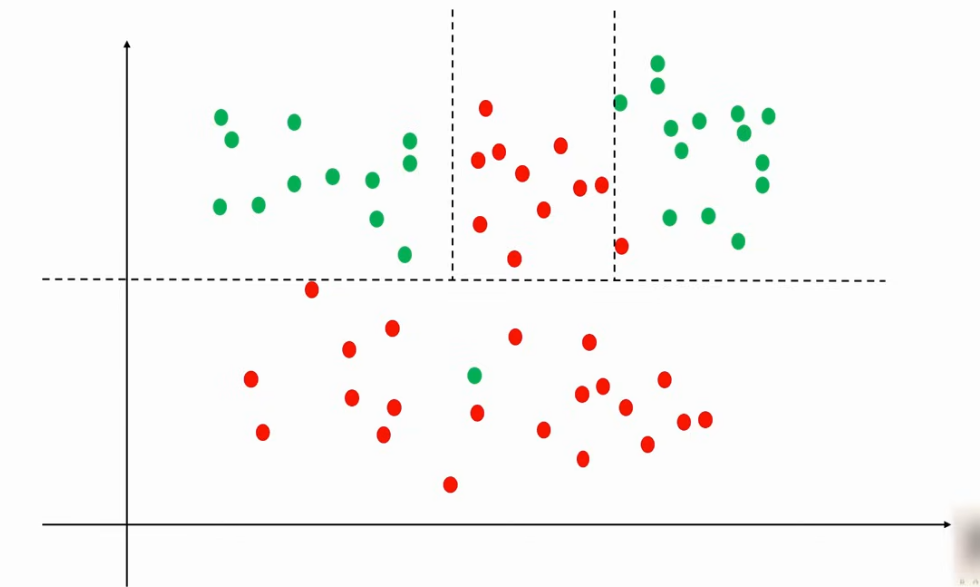

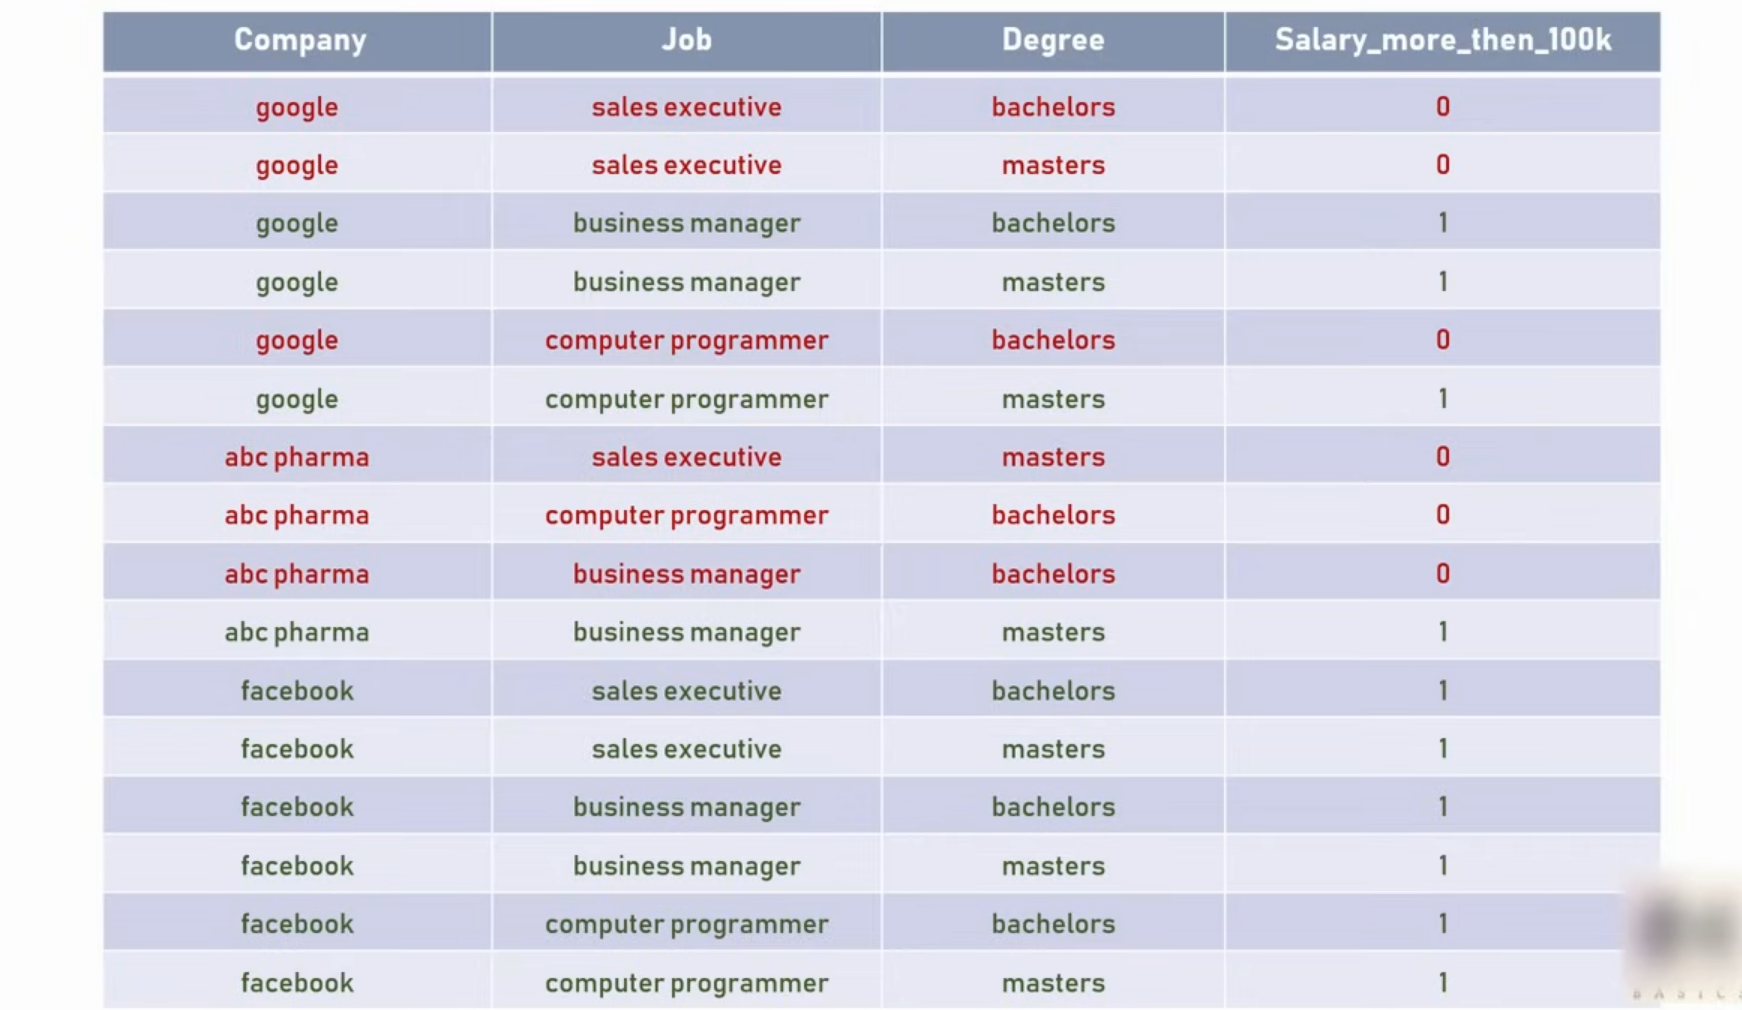

**We want to predict if a persons salary is more than 100k based on his company,job,degree**

So you will start building a decission tree like this...

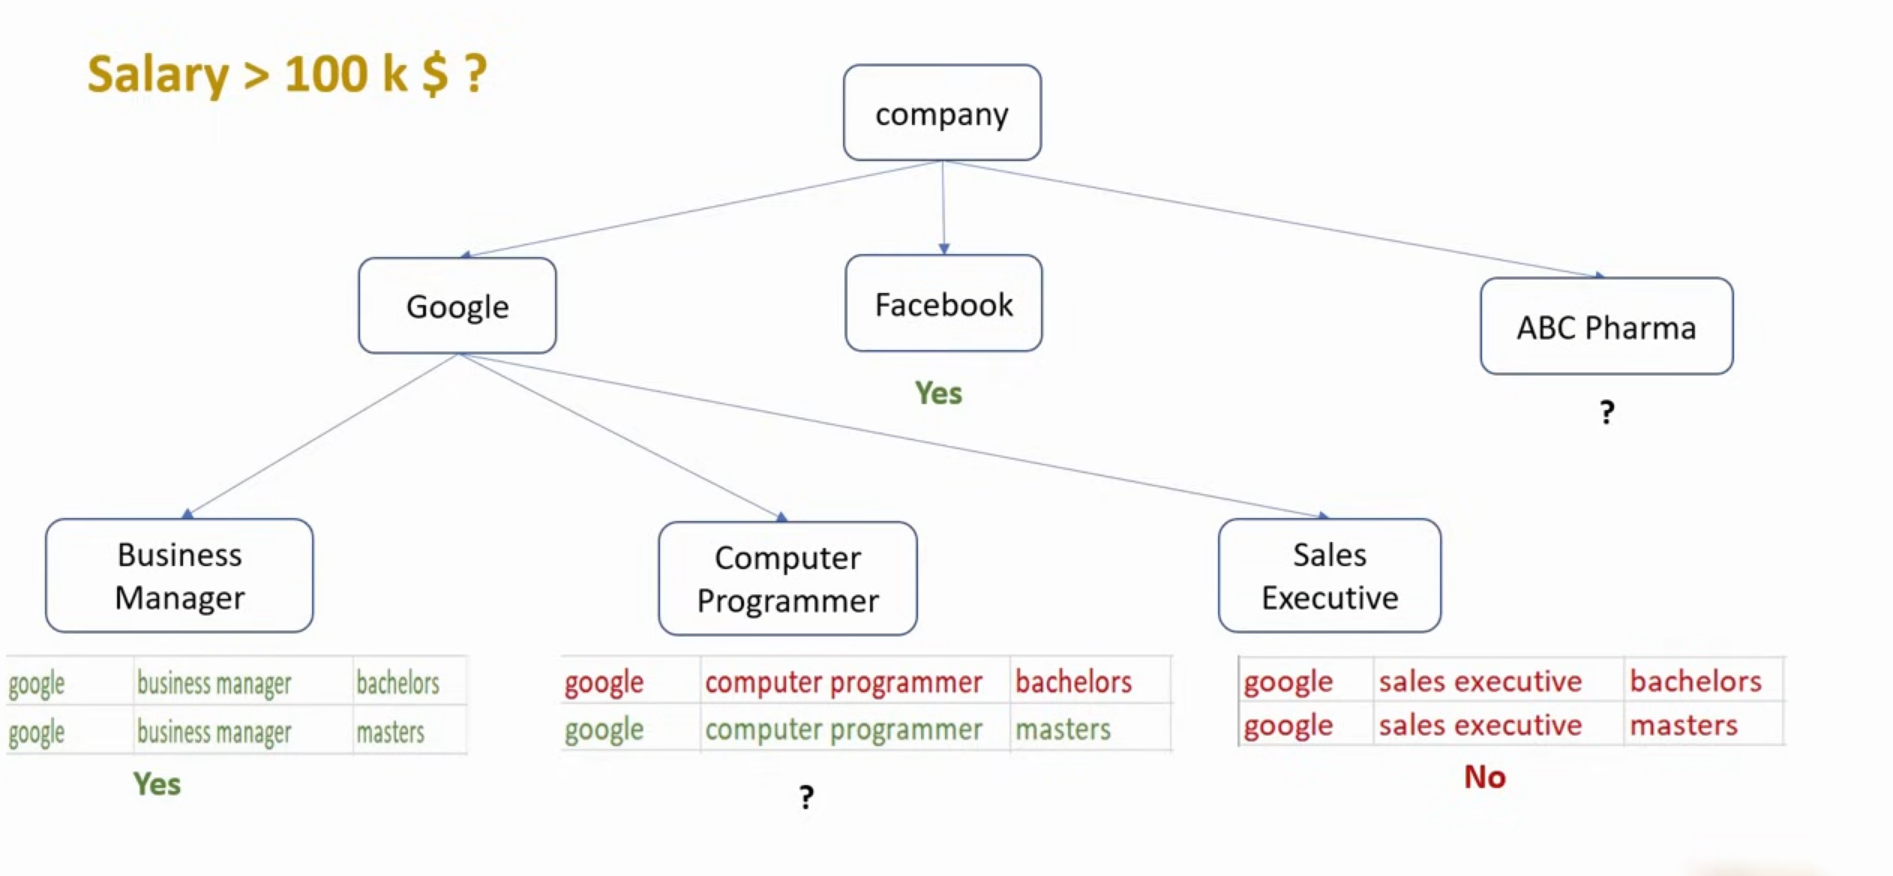

Finally after analysing the data completly we will build the tree which would look something like this...

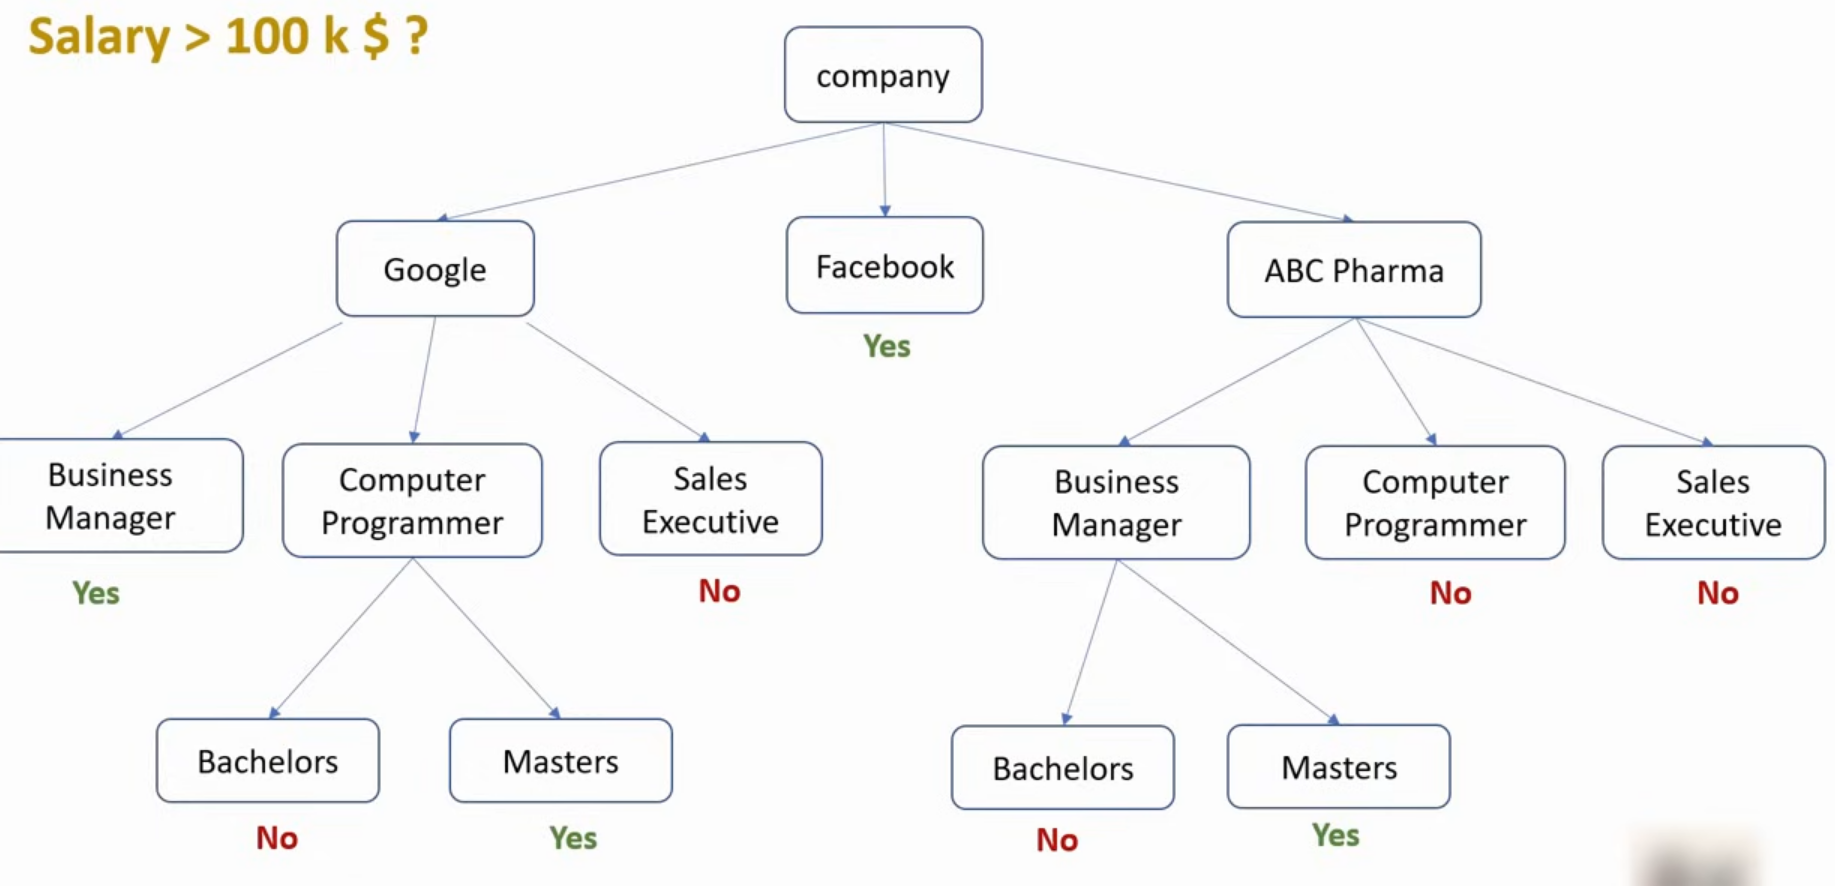

This looks very simple but in real life we will wont have only 3 attributes we have 50+ attributes, and it matters in which order you split them, right now we split like company first then job title and then the degree.
**In which order we will choose the attributes will affect the performance of the algorithm**

***How do we exactly select the ordering of these attributes???***

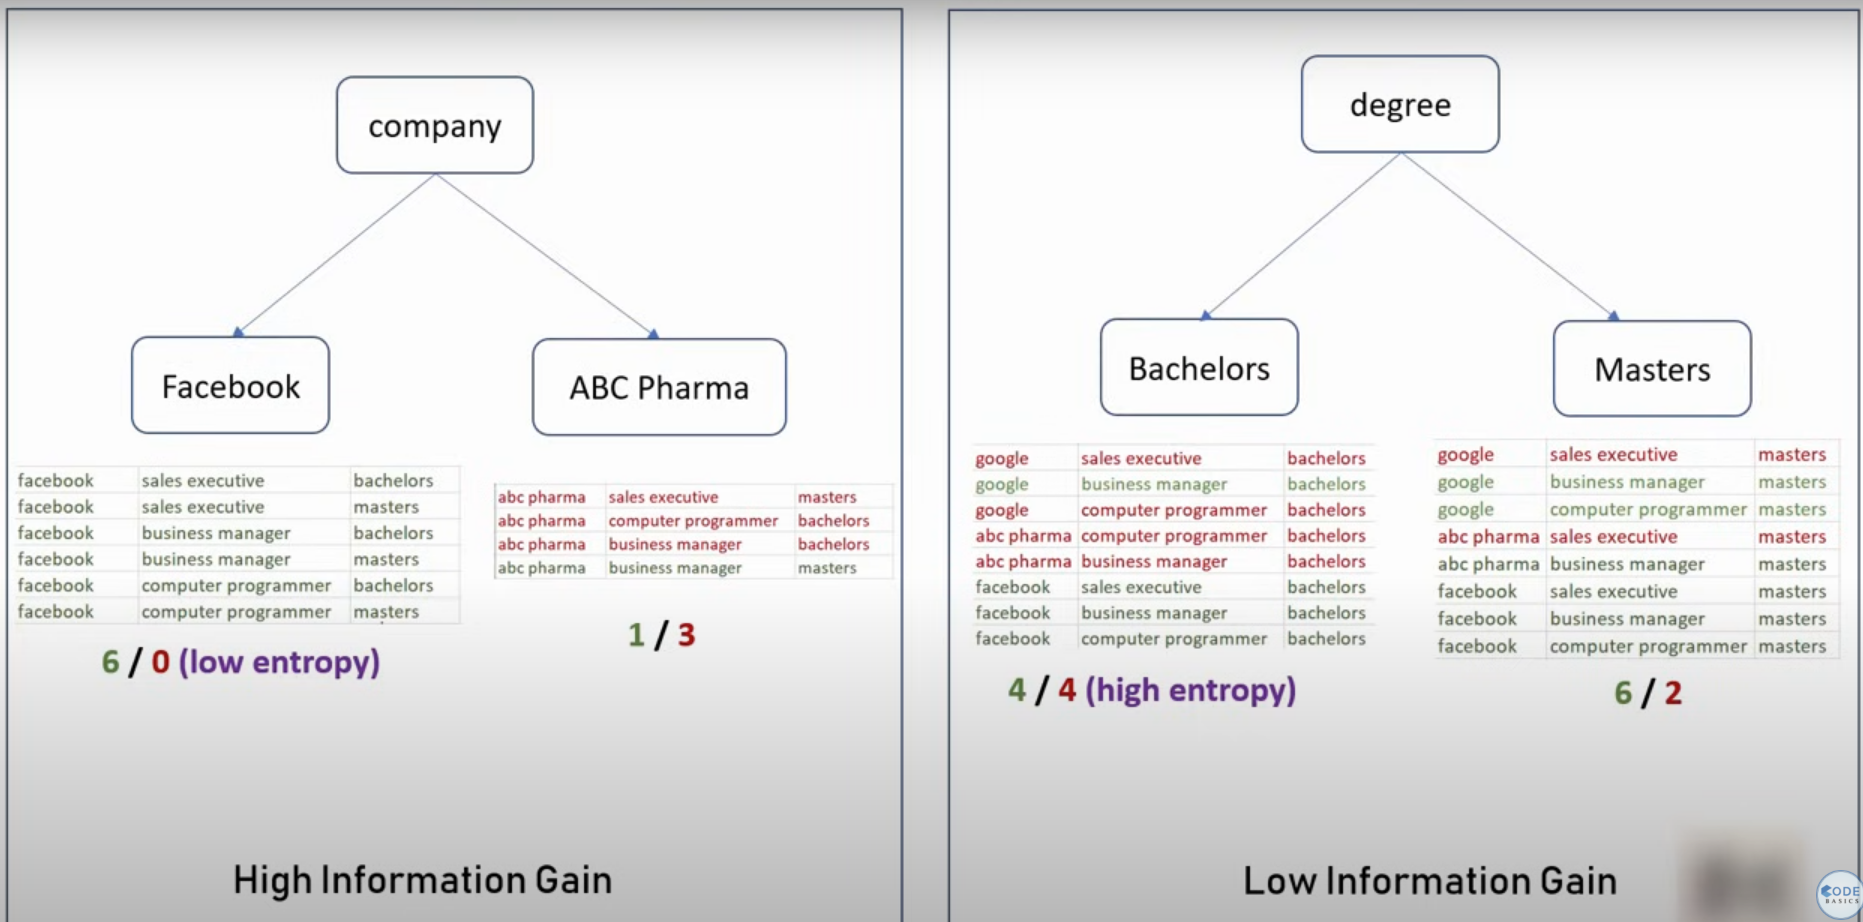

***So what is entopy?***

Entropy is a measure of randomness in the data:

{High Entropy -> More Randomness}

{Low Entropy -> Less Randomess}


High Info Gain -> Low Entropy

Low Info Gain -> High Info Gain

**We need high info gain**

So we choose company first compared to degree


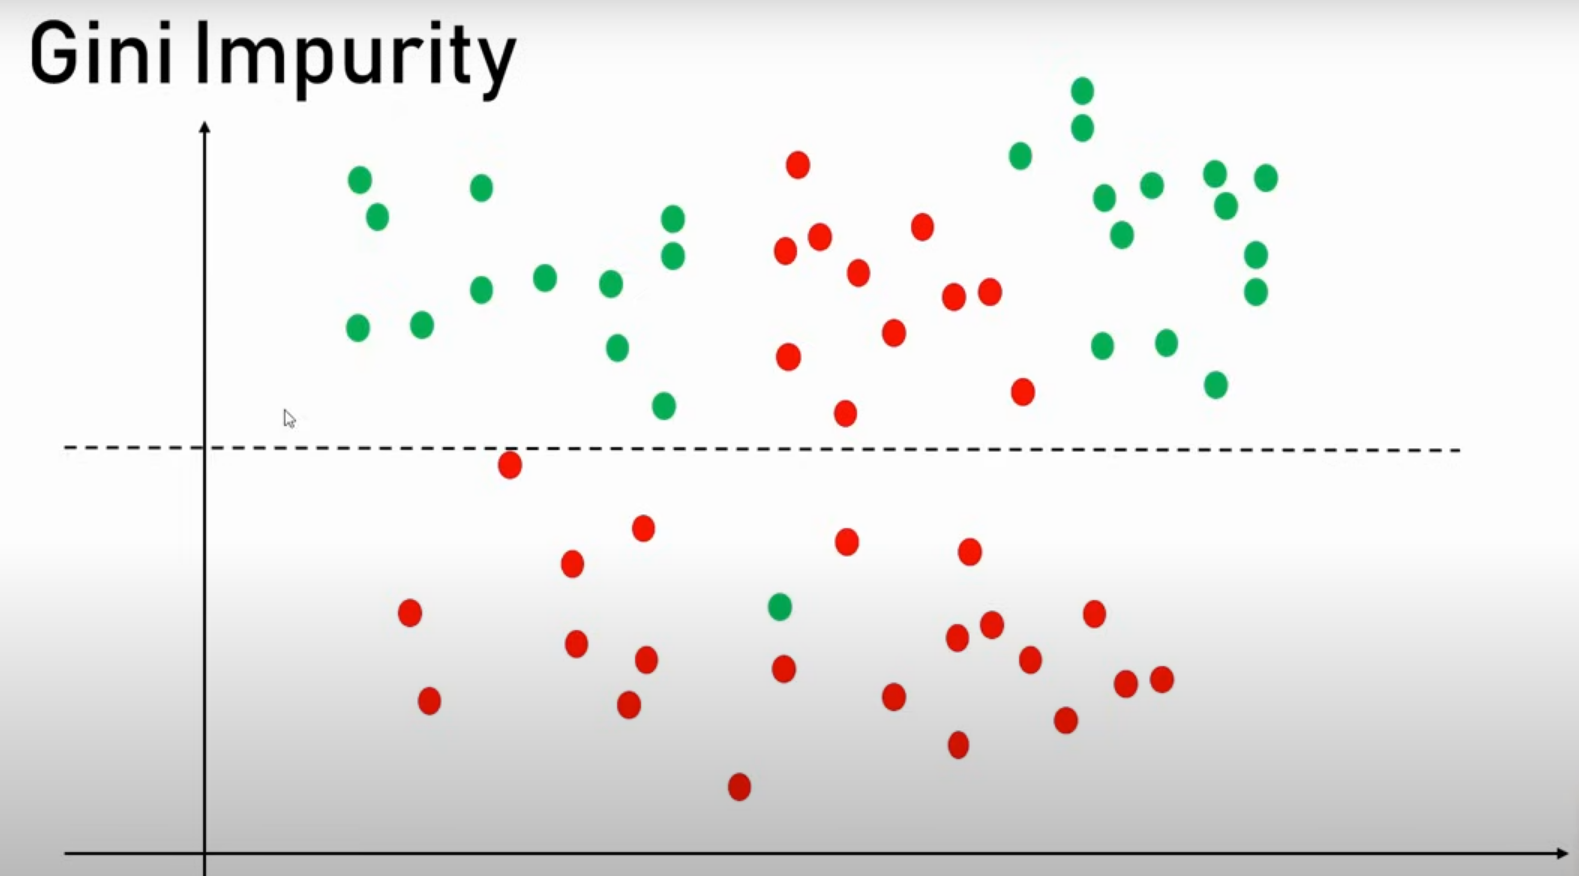

Another term you hear when you are dealing with decission tree, that is **GINI IMPURITY**
Its nothing but impurity in your dataset after splitting which you can see in the image!


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv('salary_data.csv')
df.head()

company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0

In [14]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']

In [15]:
inputs

company                  job     degree
0       google      sales executive  bachelors
1       google      sales executive    masters
2       google     business manager  bachelors
3       google     business manager    masters
4       google  computer programmer  bachelors
5       google  computer programmer    masters
6   abc pharma      sales executive    masters
7   abc pharma  computer programmer  bachelors
8   abc pharma     business manager  bachelors
9   abc pharma     business manager    masters
10    facebook      sales executive  bachelors
11    facebook      sales executive    masters
12    facebook     business manager  bachelors
13    facebook     business manager    masters
14    facebook  computer programmer  bachelors
15    facebook  computer programmer    masters

In [16]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [18]:
df['company_n'] = le_company.fit_transform(df['company'])
df['job_n'] = le_company.fit_transform(df['job'])
df['degree_n'] = le_company.fit_transform(df['degree'])

In [19]:
df

company                  job     degree  salary_more_then_100k  \
0       google      sales executive  bachelors                      0   
1       google      sales executive    masters                      0   
2       google     business manager  bachelors                      1   
3       google     business manager    masters                      1   
4       google  computer programmer  bachelors                      0   
5       google  computer programmer    masters                      1   
6   abc pharma      sales executive    masters                      0   
7   abc pharma  computer programmer  bachelors                      0   
8   abc pharma     business manager  bachelors                      0   
9   abc pharma     business manager    masters                      1   
10    facebook      sales executive  bachelors                      1   
11    facebook      sales executive    masters                      1   
12    facebook     business manager  bachelors                      1   
13    facebook     business manager    masters                      1   
14    facebook  computer programmer  bachelors                      1   
15    facebook  computer programmer    masters                      1   

    company_n  job_n  degree_n  
0           2      2         0  
1           2      2         1  
2           2      0         0  
3           2      0         1  
4           2      1         0  
5           2      1         1  
6           0      2         1  
7           0      1         0  
8           0      0         0  
9           0      0         1  
10          1      2         0  
11          1      2         1  
12          1      0         0  
13          1      0         1  
14          1      1         0  
15          1      1         1

In [23]:
input_n = df.drop(['company','job','degree'],axis='columns')
input_n

salary_more_then_100k  company_n  job_n  degree_n
0                       0          2      2         0
1                       0          2      2         1
2                       1          2      0         0
3                       1          2      0         1
4                       0          2      1         0
5                       1          2      1         1
6                       0          0      2         1
7                       0          0      1         0
8                       0          0      0         0
9                       1          0      0         1
10                      1          1      2         0
11                      1          1      2         1
12                      1          1      0         0
13                      1          1      0         1
14                      1          1      1         0
15                      1          1      1         1

In [24]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(input_n,target)

DecisionTreeClassifier()

In [25]:
model.score(input_n,target)

1.0

**Exercise**

In [26]:
tdf = pd.read_csv('titanic.csv')
tdf.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [27]:
t2df= tdf.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')

In [28]:
t2df

Survived  Pclass     Sex   Age     Fare
0           0       3    male  22.0   7.2500
1           1       1  female  38.0  71.2833
2           1       3  female  26.0   7.9250
3           1       1  female  35.0  53.1000
4           0       3    male  35.0   8.0500
..        ...     ...     ...   ...      ...
886         0       2    male  27.0  13.0000
887         1       1  female  19.0  30.0000
888         0       3  female   NaN  23.4500
889         1       1    male  26.0  30.0000
890         0       3    male  32.0   7.7500

[891 rows x 5 columns]

In [29]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

In [30]:
enc_sex = le_sex.fit_transform(t2df['Sex'])

In [33]:
enc_sex = pd.Series(enc_sex, name='Sex_encoded')
t2df = pd.concat([t2df, enc_sex], axis='columns')

In [34]:
t2df.drop(['Sex'],axis='columns',inplace=True)

In [35]:
inputs = t2df.drop('Survived',axis='columns')
target = t2df['Survived']

In [36]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs,target)

DecisionTreeClassifier()

In [38]:
model.score(inputs,target)

0.978675645342312